# 1. Load Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import warnings

from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import het_arch
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from pylab import rcParams



from statsmodels.tsa.seasonal import seasonal_decompose

import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False


In [ ]:
# Set stable random
def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)

    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHEED"] = str(seed)
    print(f"Random seed set as {seed}")

set_seed()

Random seed set as 42


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/[BI Season 8] Workspace/ROUND 2/THÀNH/order prediction.csv')

In [ ]:
data


,date,number_order
0,2022-01-01,6
1,2022-01-02,3
2,2022-01-03,10
3,2022-01-04,7
4,2022-01-05,11
...,...,...
343,2022-12-26,2785
344,2022-12-27,1696
345,2022-12-28,1668
346,2022-12-29,2179


In [ ]:
data.dtypes

date            object
number_order     int64
dtype: object

In [ ]:
data['date']=pd.to_datetime(data['date'])

In [ ]:
data.head()

,date,number_order
0,2022-01-01,6
1,2022-01-02,3
2,2022-01-03,10
3,2022-01-04,7
4,2022-01-05,11


<ipython-input-10-efdd0068af58>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['number_order'], color='#682F2F')


0.48


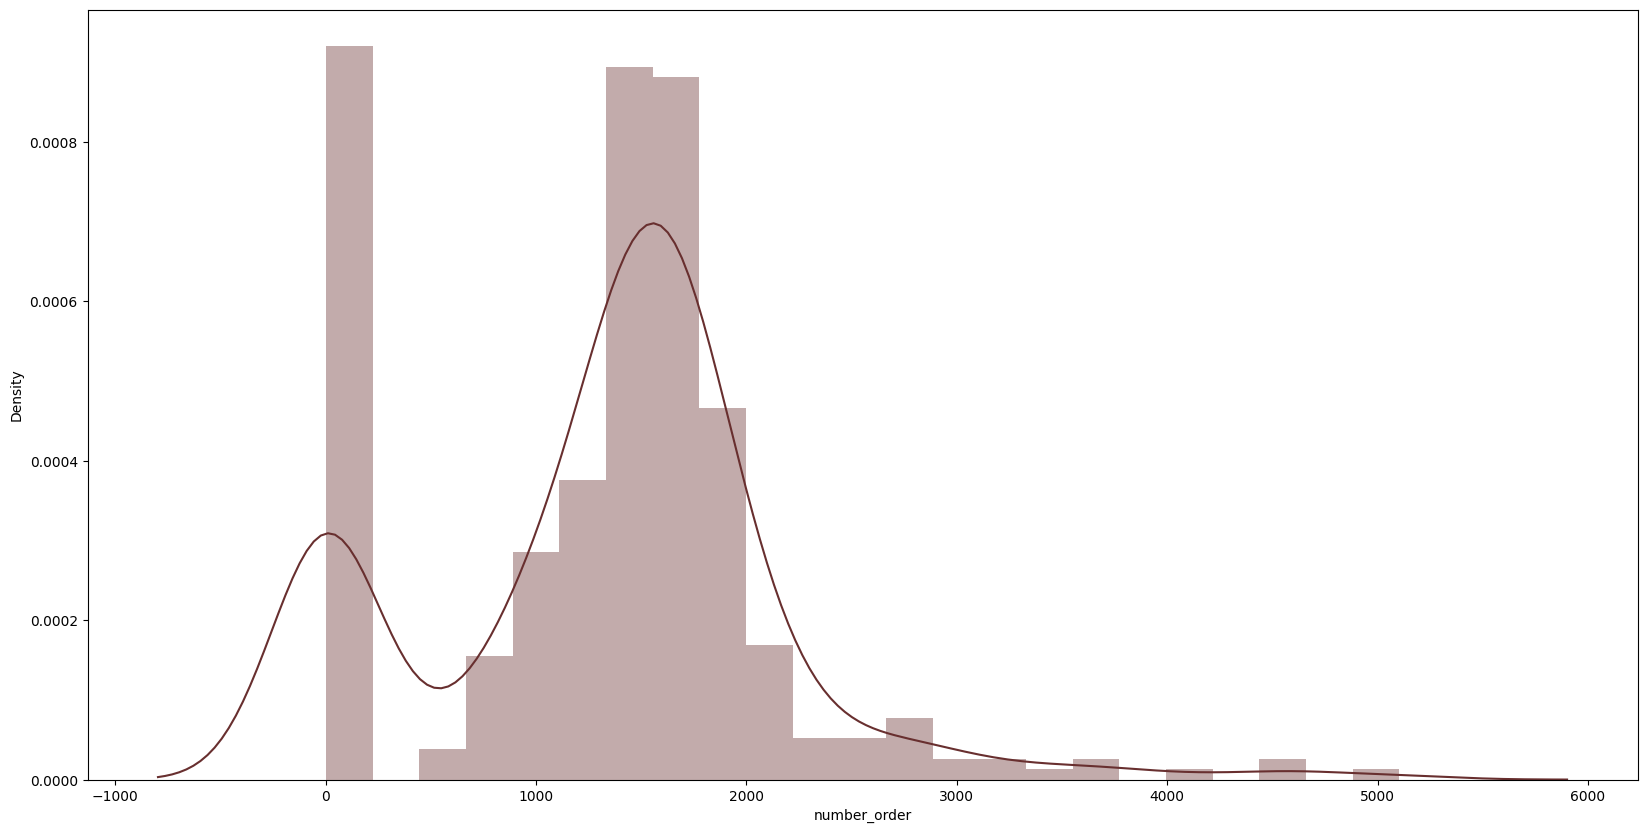

In [ ]:
plt.figure(figsize = (20, 10))
sns.distplot(data['number_order'], color='#682F2F')
print(data['number_order'].skew().round(2))

## 3.2. LSTM Model

## Model Preprocessing


In [ ]:
np.random.seed(42)
# Creating a copy of the original data
VNI = data.copy()

# Sort the data by Date
VNI = VNI.sort_values(by=['date'])

# Filter out only 'Date' and 'Price' columns
VNI_subset = VNI[['number_order']]

# Convert the DataFrame to a numpy array
VNI_LSTM = VNI_subset.filter(['number_order']).values

# Check the data for correct coding
VNI_subset.head()

,number_order
0,6
1,3
2,10
3,7
4,11


In [ ]:
# Calculating the number of rows remaining after subtracting the last 365 rows for testing
training_data_len = int(np.ceil( len(VNI_LSTM) - 40 ))

training_data_len

308

In [ ]:
# Data scaling with MinMaxScaler()
MMS = MinMaxScaler()
scaled_data = MMS.fit_transform(VNI_LSTM)
scaled_data

array([[9.80007840e-04],
       [3.92003136e-04],
       [1.76401411e-03],
       [1.17600941e-03],
       [1.96001568e-03],
       [9.80007840e-04],
       [9.80007840e-04],
       [2.94002352e-03],
       [1.37201098e-03],
       [1.56801254e-03],
       [1.96001568e-03],
       [7.84006272e-04],
       [2.35201882e-03],
       [1.76401411e-03],
       [2.35201882e-03],
       [2.35201882e-03],
       [2.15601725e-03],
       [3.13602509e-03],
       [1.76401411e-03],
       [1.56801254e-03],
       [1.17600941e-03],
       [9.80007840e-04],
       [7.84006272e-04],
       [2.54802038e-03],
       [1.17600941e-03],
       [7.84006272e-04],
       [5.88004704e-04],
       [5.88004704e-04],
       [1.96001568e-04],
       [0.00000000e+00],
       [7.84006272e-04],
       [7.84006272e-04],
       [1.56801254e-03],
       [1.56801254e-03],
       [1.56801254e-03],
       [9.80007840e-04],
       [1.17600941e-03],
       [1.17600941e-03],
       [1.17600941e-03],
       [3.13602509e-03],


In [ ]:
# Create the training dataset previously scaled
train_data = scaled_data[0:int(training_data_len), :]
train_data

array([[9.80007840e-04],
       [3.92003136e-04],
       [1.76401411e-03],
       [1.17600941e-03],
       [1.96001568e-03],
       [9.80007840e-04],
       [9.80007840e-04],
       [2.94002352e-03],
       [1.37201098e-03],
       [1.56801254e-03],
       [1.96001568e-03],
       [7.84006272e-04],
       [2.35201882e-03],
       [1.76401411e-03],
       [2.35201882e-03],
       [2.35201882e-03],
       [2.15601725e-03],
       [3.13602509e-03],
       [1.76401411e-03],
       [1.56801254e-03],
       [1.17600941e-03],
       [9.80007840e-04],
       [7.84006272e-04],
       [2.54802038e-03],
       [1.17600941e-03],
       [7.84006272e-04],
       [5.88004704e-04],
       [5.88004704e-04],
       [1.96001568e-04],
       [0.00000000e+00],
       [7.84006272e-04],
       [7.84006272e-04],
       [1.56801254e-03],
       [1.56801254e-03],
       [1.56801254e-03],
       [9.80007840e-04],
       [1.17600941e-03],
       [1.17600941e-03],
       [1.17600941e-03],
       [3.13602509e-03],


In [ ]:
# Spliting the train data into x_train and y_train
x_train = []
y_train = []
size = 15

for i in range(size, len(train_data)):
    x_train.append(train_data[i-size:i, 0])
    y_train.append(train_data[i, 0])

# Convert training data into numpy arrays to fit into the model
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(293, 15, 1)

In [ ]:
# Create the test dataset
test_data = scaled_data[training_data_len - size: , :]

# Split the data sets x_test and y_test with similar ideas to the train dataset
x_test = []
y_test = VNI_LSTM[training_data_len:, :]
for i in range(size, len(test_data)):
    x_test.append(test_data[i-size:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_test.shape

(40, 15, 1)

In [ ]:
# Define the hyperparameters to tune
param_dist = {
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [15, 30, 45],
    'batch_size': [16, 32, 64]
}

# Create a function to build the model
def create_model(optimizer):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Prepare data
# Assuming x_train and y_train are already defined
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Function to get optimizer
def get_optimizer(name):
    if name == 'adam':
        return Adam()
    elif name == 'rmsprop':
        return RMSprop()

# Initialize variables to store the best score and parameters
best_score = float('inf')
best_params = None

# Perform random search
for _ in range(10):  # n_iter = 10
    # Randomly sample hyperparameters
    optimizer_name = np.random.choice(param_dist['optimizer'])
    optimizer = get_optimizer(optimizer_name)
    epochs = np.random.choice(param_dist['epochs'])
    batch_size = np.random.choice(param_dist['batch_size'])

    # Build and train the model
    model = create_model(optimizer)
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(x_val, y_val))

    # Evaluate the model
    score = model.evaluate(x_val, y_val, verbose=0)

    # Update best score and parameters
    if score < best_score:
        best_score = score
        best_params = {
            'optimizer': optimizer_name,
            'epochs': epochs,
            'batch_size': batch_size
        }

# Print the best score and best parameters
print("Best: %f using %s" % (best_score, best_params))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best: 0.009995 using {'optimizer': 'adam', 'epochs': 45, 'batch_size': 64}


## Model Training


In [ ]:
# LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(32))
model.add(Dense(1))



In [ ]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 15, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 169,537 (662.25 KB)

 Trainable params: 169,537 (662.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model based on decided optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
np.random.seed(42)
model.fit(x_train, y_train, batch_size=16, epochs=45, validation_data=(x_val, y_val), callbacks=early_stopping)

Epoch 1/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0355 - val_loss: 0.0126
Epoch 2/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0138 - val_loss: 0.0117
Epoch 3/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0100 - val_loss: 0.0132
Epoch 4/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0149 - val_loss: 0.0146
Epoch 5/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0137 - val_loss: 0.0120
Epoch 6/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - val_loss: 0.0114
Epoch 7/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0165 - val_loss: 0.0128
Epoch 8/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0192 - val_loss: 0.0116
Epoch 9/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - val_loss: 0.0111
Epoch 10/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0190 - val_loss: 0.0113
Epoch 11/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0134 - val_loss: 0.0109
Epoch 12/45
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0

### Model Testing

The test dataset is extracted and processed in a similar fashion as the traning


In [ ]:
# Create the test dataset
test_data = scaled_data[training_data_len - size: , :]

# Split the data sets x_test and y_test with similar ideas to the train dataset
x_test = []
y_test = VNI_LSTM[training_data_len:, :]
for i in range(size, len(test_data)):
    x_test.append(test_data[i-size:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



In [ ]:
# Predicted values of the model
predictions = model.predict(x_test)
predictions = MMS.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


### Model Evaluation

### Results Visualization

In [ ]:
# Ensure 'Date' is a datetime column
VNI['date'] = pd.to_datetime(VNI['date'])

# Create the training data used for plotting
viz_train = VNI[:training_data_len].copy()
viz_train.set_index('date', inplace=True)

# Create the testing and predictions data used for plotting
viz_test = VNI[training_data_len:].copy()
viz_test.set_index('date', inplace=True)
viz_test.insert(1, 'Predictions', predictions, True)

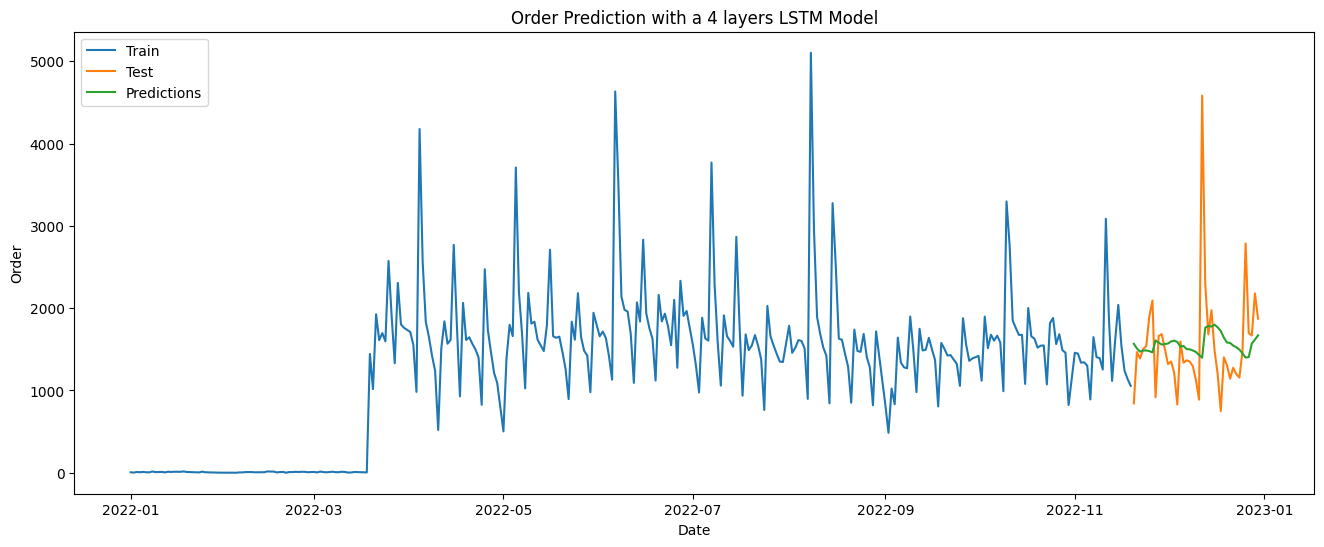

In [ ]:
# Line Chart
plt.figure(figsize=(16,6))
plt.title('Order Prediction with a 4 layers LSTM Model')
plt.xlabel('Date')
plt.ylabel('Order')
plt.plot(viz_train.index, viz_train['number_order'])
plt.plot(viz_test.index, viz_test[['number_order', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming you have defined VNI_subset, MMS, and model somewhere in your code
last_date = '2022-12-30'
future_dates = pd.date_range(last_date, periods=30)  # Match the number of predictions

ticker = 'VNIndex'
# Get last 30 days values and convert into array
last_30_days = VNI_subset[-348:].values

# Scale the data to be values between 0
last_30_days_scaled = MMS.transform(last_30_days)

# Dự báo 30 ngày tiếp theo
time_step = 348
input_data = last_30_days_scaled  # Lấy dữ liệu 30 ngày cuối
input_data = input_data.reshape((1, time_step, 1))

future_predictions = []
for _ in range(30):  # Dự báo 30 ngày tiếp theo
    prediction = model.predict(input_data)
    future_predictions.append(prediction[0, 0])
    # Chuyển đổi prediction thành đúng định dạng trước khi append
    input_data = np.append(input_data[:, 1:, :], np.reshape(prediction, (1, 1, 1)), axis=1)

future_predictions = MMS.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Tạo DataFrame để lưu kết quả dự báo với ngày
future_df = pd.DataFrame(future_predictions, index=future_dates, columns=['Predicted Value'])

# In ra kết quả dự báo
print("Dự báo 30 ngày tiếp theo:", future_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━

In [ ]:
future_df

,Predicted Value
2022-12-30,1933.419922
2022-12-31,1947.262085
2023-01-01,1959.005005
2023-01-02,1970.066650
2023-01-03,1979.620972
2023-01-04,1988.334839
2023-01-05,1995.436890
2023-01-06,2001.257080
2023-01-07,2007.033813
2023-01-08,2011.381226


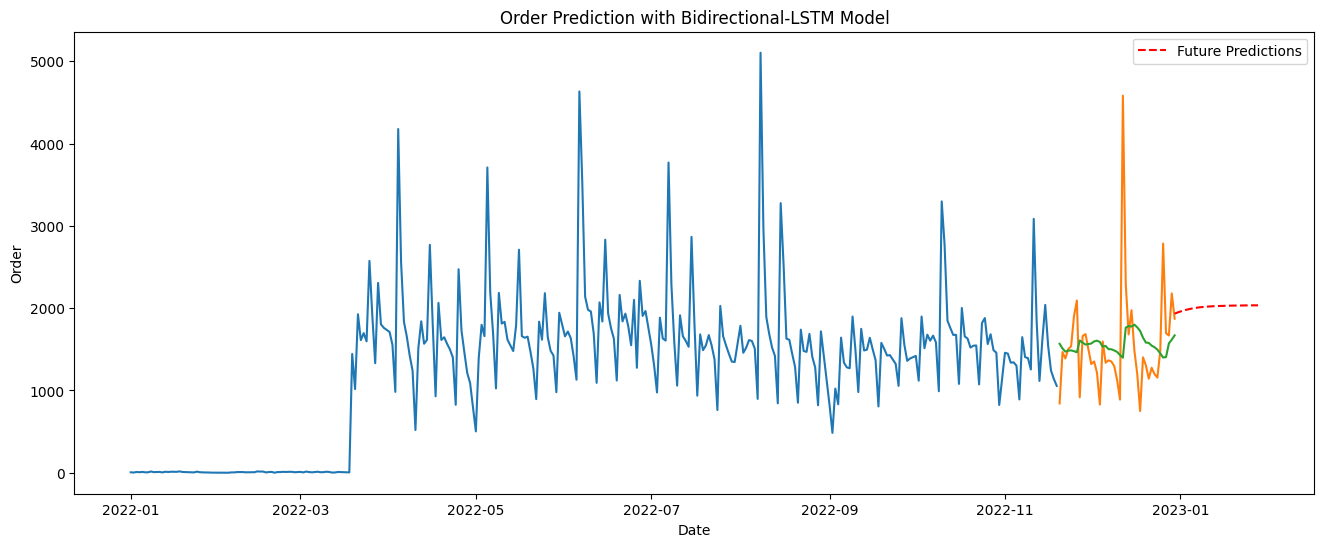

In [ ]:

# plt.plot(future_df.index, future_df.values, label='Actual Data')
# Line Chart
plt.figure(figsize=(16,6))
plt.title('Order Prediction with Bidirectional-LSTM Model')
plt.xlabel('Date')
plt.ylabel('Order')
plt.plot(viz_train.index, viz_train['number_order'])
plt.plot(viz_test.index, viz_test[['number_order', 'Predictions']])
plt.plot(future_df.index, future_df.values, label='Future Predictions', color='red', linestyle='dashed')
plt.legend(['Train', 'Test', 'Predictions'], loc='upper left')
plt.legend()
plt.show()